In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#   패키지 설치
#   pip install sklearn

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# 모델 학습
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

# 성능 조절
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint

# 성능 평가
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import silhouette_score

# 경고 메세지 숨김
import warnings     
warnings.filterwarnings('ignore')

In [2]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [3]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-10-19 16:32:14--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-10-19 16:32:15--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-10-19 16:32:15--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

# (이미지)데이터 읽기
과일 - 사과 100개, 파인애플 100개, 바나나 100개

In [20]:
fruits = np.load('fruits_300.npy')

fruits.shape    # 3차원(샘플 개수, 이미지 높이, 이미지 너비)

(300, 100, 100)

In [5]:
fruits[0, 0, :]    # 첫 번째 이미지 - 첫 번째 행

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

# 이미지( 0:검정 ~ 255:하양 )

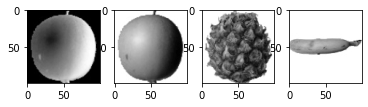

In [23]:
fig, axs = plt.subplots(1,4)

# 사과
axs[0].imshow(
    fruits[0]
    , cmap='gray'    # 흑백
    )    

# 사과
axs[1].imshow(
    fruits[0]
    , cmap='gray_r'    # 흑백 반전
    )    

# 파인애플
axs[2].imshow(
    fruits[100]
    , cmap='gray_r'    # 흑백 반전
    )  

# 바나나
axs[3].imshow(
    fruits[200]
    , cmap='gray_r'    # 흑백 반전
    )  

plt.show()

# 픽셀

In [26]:
# 2차원(너비, 높이) -> 1차원(너비X높이)
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

apple.shape    # 사과 - 100행(개수), 10000열(특성=픽셀)

(100, 10000)

In [10]:
apple

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [27]:
# 사과 - 픽셀 평균값(100행)
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

In [28]:
# 바나나 - 픽셀 평균값(100행)
banana.mean(axis=1)    

array([19.5487, 24.4884, 36.7517, 18.568 , 53.572 , 31.5789, 51.9062,
       28.4703, 23.7856, 32.1295, 29.1737, 24.5578, 27.7676, 41.3082,
       61.0437, 32.6444, 38.4187, 30.4175, 30.0639, 21.4994, 32.6018,
       39.6335, 47.8397, 57.7484, 33.6511, 23.5018, 49.6817, 44.0855,
       46.1559, 33.4963, 36.0099, 69.0751, 33.9575, 32.8786, 60.1911,
       32.9949, 45.3359, 56.1694, 36.9218, 25.6754, 32.7901, 29.0245,
       57.7134, 44.6563, 31.2138, 29.836 , 40.9228, 23.7501, 43.1543,
       32.3716, 26.0986, 55.6189, 22.2269, 29.5089, 24.0435, 22.6247,
       24.1709, 46.2714, 32.0763, 42.5076, 44.5522, 24.0199, 27.68  ,
       32.4377, 19.2198, 22.5083, 19.6742, 26.1852, 25.8368, 25.2676,
       26.4721, 34.8503, 28.5235, 80.8545, 36.9371, 47.3975, 18.7909,
       33.0428, 37.8222, 34.7819, 33.6051, 24.3963, 32.7988, 19.7609,
       32.538 , 28.5407, 23.0999, 26.3778, 27.1965, 38.7848, 18.7648,
       30.2297, 54.3816, 37.9073, 32.3126, 31.0664, 33.1657, 37.6051,
       38.1806, 26.2

### 히스토그램

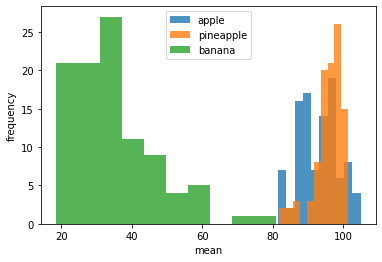

In [32]:
# 과일별 픽셀(너비X높이) 평균
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

plt.legend(['apple', 'pineapple', 'banana'])
plt.xlabel('mean')
plt.ylabel('frequency')
plt.show()

In [36]:
# 사과 - 픽셀 평균값(10000열)
np.mean(apple, axis=0).shape

(10000,)

In [37]:
np.mean(apple, axis=0)

array([1.01, 1.01, 1.01, ..., 1.  , 1.  , 1.  ])

### 막대그래프

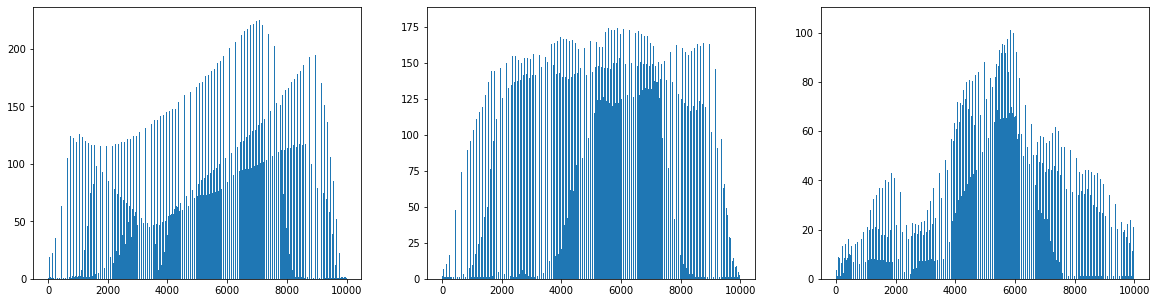

In [38]:
# 픽셀별(너비X높이) 평균
fig, axs = plt.subplots(1, 3, figsize=(20,5))

axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))

plt.show()

### 이미지

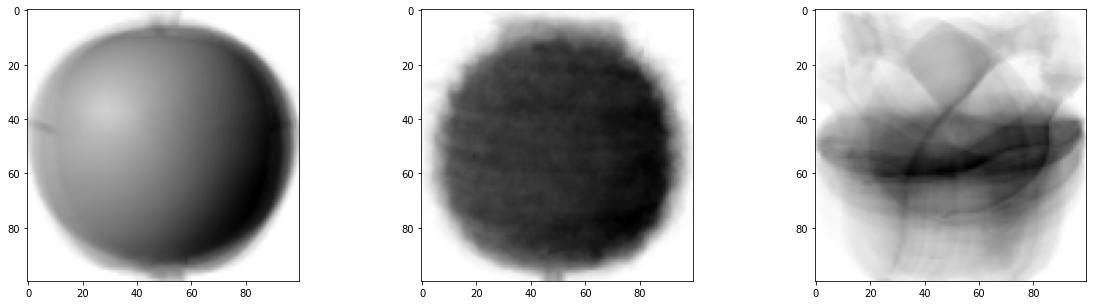

In [41]:
# 픽셀별 평균(너비, 높이)
# 1차원(너비X높이) -> 2차원(너비, 높이)
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))

axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

plt.show()

# 평균값에 가까운 이미지

In [47]:
# 절댓값 오차
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))  # 높이(100), 너비(100) 선택

abs_mean.shape

(300,)

In [48]:
abs_mean

array([17.37576 , 13.508874, 17.183394, 15.68311 , 17.983306, 20.565392,
       16.795812, 16.144276, 19.611994, 21.32059 , 16.454222, 16.590134,
       13.37039 , 17.23263 , 15.92806 , 15.496638, 18.582212, 16.48196 ,
       27.651556, 19.7871  , 20.826912, 16.417934, 17.059946, 15.904296,
       15.086176, 19.371364, 24.076362, 14.777732, 19.20517 , 20.805182,
       14.797906, 18.658418, 15.973216, 13.04259 , 18.381052, 16.59904 ,
       16.288504, 18.960586, 13.88574 , 16.497594, 18.40376 , 19.174642,
       29.096702, 18.40849 , 28.223962, 21.42994 , 19.740466, 15.590532,
       13.082678, 18.765996, 14.391198, 21.464746, 26.261028, 15.887148,
       18.568706, 16.410426, 17.108034, 13.178824, 18.199846, 13.503056,
       20.845032, 16.898184, 22.81774 , 18.99896 , 19.102706, 16.636216,
       14.845644, 19.357872, 14.778086, 14.468082, 13.085526, 15.946606,
       20.42774 , 16.241996, 13.720382, 18.416166, 15.229106, 16.411342,
       13.47148 , 20.050622, 17.296816, 21.071312, 

In [45]:
print( fruits.shape )
print( apple_mean.shape )
print( abs_diff.shape )

(300, 100, 100)
(100, 100)
(300, 100, 100)


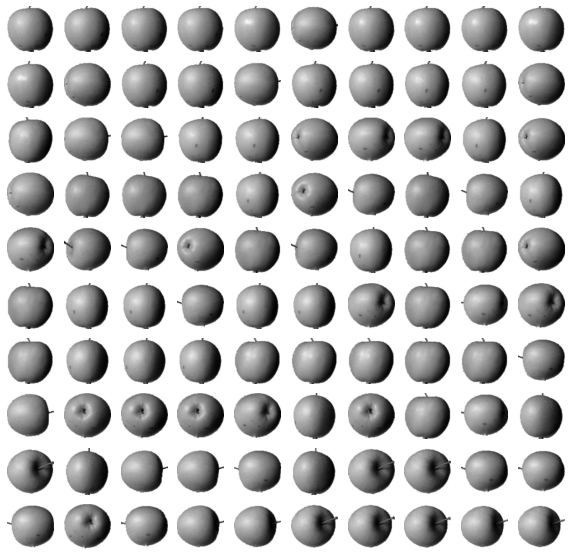

In [19]:
# 가장 작은 순서(100개)
apple_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10, 10, figsize=(10,10))

for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')  # 축X
        
plt.show()